In [67]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import ParseData
import scipy.stats as stats
import numpy as np
import pytablewriter

import importlib
importlib.reload(ParseData)

%matplotlib notebook

Data = ParseData.GetData()

Total Police Killings in Canada: Jan 2000 - June 2020: 596
Missing Recrods in CBC data:  0
Incidetns since CBC data published:  0
(21,) (22,)
LinregressResult(slope=1.1168831168831168, intercept=-2217.030303030303, rvalue=0.797612604427486, pvalue=1.4867577241482524e-05, stderr=0.19376650253448324)


<IPython.core.display.Javascript object>


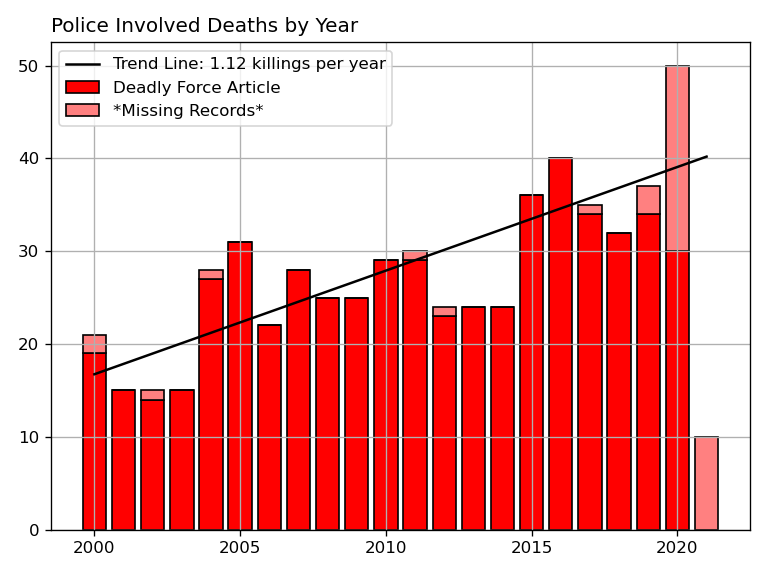

In [68]:
CA_Total=Data.CA_PoliceKillings['PROV'].count()
print('Total Police Killings in Canada: Jan 2000 - June 2020: '+str(CA_Total.sum()))
ByYear=Data.CA_PoliceKillings.resample('YS').count()['PROV']

MonthlyMiss = Data.CA_PoliceKillings.loc[Data.CA_PoliceKillings['DATA SOURCE']=='Other'].resample('MS').count()['PROV']
print('Missing Recrods in CBC data: ',MonthlyMiss.loc[MonthlyMiss.index<'2020-07-01'].sum())

print('Incidetns since CBC data published: ',MonthlyMiss.loc[MonthlyMiss.index>='2020-07-01'].sum())


CBC_Article = Data.CA_PoliceKillings.loc[Data.CA_PoliceKillings['DATA SOURCE']=='CBC Deadly Force'].resample('YS').count()['PROV']
Missing = Data.CA_PoliceKillings.loc[Data.CA_PoliceKillings['DATA SOURCE']!='CBC Deadly Force'].resample('YS').count()['PROV']
print(CBC_Article.shape,
Missing.shape)

LR = stats.linregress(ByYear.index.year[:-1],ByYear.values[:-1])
print(LR)


fig,ax=plt.subplots(1,1)
ax.set_title('Police Involved Deaths by Year',loc='left')
ax.bar(CBC_Article.index.year,CBC_Article.values,
       color=[1,0,0],edgecolor='k',label='Deadly Force Article')
ax.bar(Missing.index.year,Missing.values,bottom = np.append(CBC_Article.values,[0]),
       color=[1,0.5,0.5],edgecolor='k',label='*Missing Records*')
# ax.bar([2020],[ByYear.values[-1]],color=[1,.5,.5],edgecolor='k',label='Total Jan-Nov')
ax.plot(ByYear.index.year,ByYear.index.year*LR[0]+LR[1],
        color='k',label = 'Trend Line: '+str(np.round(LR[0],2))+' killings per year')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('Content/CA_Trendline.png')

In [69]:
ByRace = (Data.CA_PoliceKillings.groupby('RACE').count()['PROV'])
print(ByRace['Unknown']/ByRace.sum())

0.2516778523489933


<IPython.core.display.Javascript object>


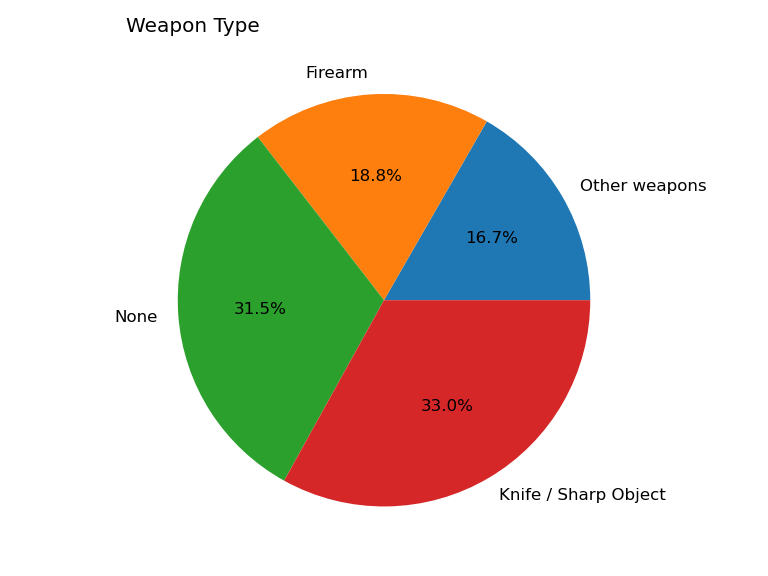

In [70]:
Weaopn_Type=Data.CA_PoliceKillings.groupby('ARMED TYPE').count()['AGE'].sort_values()

fig,ax=plt.subplots(1,1)
ax.set_title('Weapon Type',loc='left')
ax.pie(Weaopn_Type.values,labels=Weaopn_Type.index,
    autopct='%1.1f%%')
plt.tight_layout()
plt.savefig('Content/CA_Weapon.png')

In [71]:
Category = 'RACE'
Departments=Data.CA_PoliceKillings.groupby(['POLICE SERVICE','PROV',Category]).count()['SUMMARY'].unstack()
Departments=Departments.reset_index().set_index('POLICE SERVICE')
Departments=Departments.fillna(value=0)
print(Departments.sort_values(by='Indigenous',ascending=False).head())

RACE                          PROV  Arab  Asian  Black  Indigenous  \
POLICE SERVICE                                                       
RCMP                            BC   0.0    2.0    0.0        14.0   
Winnipeg Police Service         MB   1.0    0.0    2.0        14.0   
RCMP                            AB   0.0    0.0    0.0        10.0   
RCMP                            NU   0.0    0.0    0.0         8.0   
Kativik Regional Police Force   QC   0.0    0.0    0.0         8.0   

RACE                           Latin American  South Asian  Unknown  \
POLICE SERVICE                                                        
RCMP                                      0.0          3.0     20.0   
Winnipeg Police Service                   0.0          0.0      1.0   
RCMP                                      0.0          0.0     17.0   
RCMP                                      0.0          0.0      0.0   
Kativik Regional Police Force             0.0          0.0      0.0   

RACE       

In [72]:



Departments['Total'] = Departments[Data.CA_PoliceKillings[Category].unique()].sum(axis=1)

Departments['NAME']=Departments.index
Departments['NAME']=Departments['NAME'].str.replace(' Department','')
Departments['NAME']=Departments['NAME'].str.replace(' Services','')
Departments['NAME']=Departments['NAME'].str.replace(' Service','')
Departments['NAME']=Departments['NAME'].str.replace(' Force','')
Departments['NAME']=Departments['NAME'].str.replace('Service de police de la Ville de ','')
Departments['NAME']=Departments['NAME'].str.replace('Service de la sécurité publique de ','')
Departments['NAME']=Departments['NAME'].str.replace('Service de police de ','')
Departments['NAME']=Departments['NAME'].str.replace('Régie intermunicipale de police ','')
Departments['NAME']=Departments['NAME'].str.replace('Service de sécurité publique de ','')
Departments['NAME']=Departments['NAME'].str.replace('Sécurité publique de ','')

Departments['City']=Departments['NAME'].str.replace('Ontario Provincial Police','')
Departments['City']=Departments['City'].str.replace(' Police','')
Departments['City']=Departments['City'].str.replace('RCMP','')
Departments['City']=Departments['City'].str.replace('Sûreté du Québec','')
Departments['City']=Departments['City'].str.replace(' Regional','')
Departments['City']=Departments['City'].str.replace('Royal Newfoundland Constabulary','')
Departments['City']=Departments['City'].str.replace(' Community','')
Departments['City']=Departments['City'].str.replace('South Coast British Columbia Transit Authority','')
Departments['City']=Departments['City'].str.replace("l'agglomération de ",'')
Departments['City']=Departments['City'].str.replace('du ','')

Departments['TYPE']='Municipal/Regional'
# Departments.loc[Departments.index.str.contains('Regional')==True,'TYPE']='Regional'
# Departments.loc[Departments.index.str.contains('Toronto')==True,'TYPE']='Regional'
# Departments.loc[Departments.index.str.contains("Service de police de l'agglomération de ")==True,'TYPE']='Regional'
# Departments.loc[Departments.index.str.contains('Transit Authority Police Service')==True,'TYPE']='Regional'
# Departments.loc[Departments.index.str.contains('Régie intermunicipale de police')==True,'TYPE']='Regional'
# Departments.loc[Departments.index.str.contains('Service de police de la Ville de Montréal')==True,'TYPE']='Regional'
Departments.loc[Departments.index.str.contains('RCMP')==True,'TYPE']='RCMP'
Departments.loc[Departments.index.str.contains('Ontario Provincial Police')==True,'TYPE']='Provincial'
Departments.loc[Departments.index.str.contains('OPP')==True,'TYPE']='Provincial'
Departments.loc[Departments.index.str.contains('Sûreté du Québec')==True,'TYPE']='Provincial'
Departments.loc[Departments.index.str.contains('Royal Newfoundland Constabulary')==True,'TYPE']='Provincial'

writer = pytablewriter.MarkdownTableWriter()
writer.table_name = "Deadliest Police Departments in Canada"
writer.header_list = ['Rank',"Department", "Province", "Killings"]
TB = Departments.loc[Departments['Total']>=10].sort_values(by='Total',ascending=False).reset_index()#[0:10]
writer.value_matrix = [[index+1,value['POLICE SERVICE'],value['PROV'],value['Total']]for index,value in TB.iterrows()]
# list(Departments.groupby('TYPE').count()['NAME'])
#     ["1", "AD", "Europe/Andorra"],
#     ["2", "AE", "Asia/Dubai"],
#     ["3", "AF", "Asia/Kabul"],
#     ["4", "AG", "America/Antigua"],
#     ["5", "AI", "America/Anguilla"],
# ]
# print(Departments.head())
writer.write_table()

print(Departments['Total'].count())
print(Departments.loc[Departments['Total']>=10,'Total'].sum())
print(Departments.loc[Departments['Total']>=10,'Total'].count())

print(Departments.loc[Departments['Total']>=10,'Total'].sum()/CA_Total.sum())

print(Departments.loc[Departments.index == 'RCMP'].sum()['Total'])

print(Departments.loc[Departments.index == 'RCMP'].sum()['Total']/CA_Total.sum())

# print(80/CA_Total.sum())


# Deadliest Police Departments in Canada
|Rank|               Department                |Province|Killings|
|---:|-----------------------------------------|--------|-------:|
|   1|RCMP                                     |BC      |      82|
|   2|Toronto Police Service                   |ON      |      58|
|   3|RCMP                                     |AB      |      38|
|   4|Service de police de la Ville de Montréal|QC      |      35|
|   5|Sûreté du Québec                         |QC      |      34|
|   6|Ontario Provincial Police                |ON      |      33|
|   7|Edmonton Police Service                  |AB      |      29|
|   8|Calgary Police Service                   |AB      |      27|
|   9|Vancouver Police Department              |BC      |      25|
|  10|Winnipeg Police Service                  |MB      |      21|
|  11|Peel Regional Police                     |ON      |      16|
|  12|Ottawa Police Service                    |ON      |      10|
|  13|York Regional P

In [73]:
from geopy.geocoders import MapBox
import geopandas as gpd
api_key="pk.eyJ1IjoianVuZXNwYWNlYm9vdHMiLCJhIjoiY2s4a285NTM1MDQwbDNocHozdXlkNzIyaSJ9.-_8gh9gG4VuprIPnmXBr3A"

geolocator = MapBox(api_key=api_key)

# print(Departments)

Departments['Lat']=np.nan
Departments['Lon']=np.nan
Departments['Geocoding_notes']=''

for index,Service in Departments.sort_values(by='Total',ascending=False).iterrows():
    try:
        if Service.TYPE=='Municipal/Regional':
            Point = geolocator.geocode(Service.NAME+', '+Service.City+', '+Data.can_province_names[Service.PROV]+', Canada')#,exactly_one=False)
            Departments.loc[((Departments.NAME==Service.NAME)&(Departments.PROV==Service.PROV)),['Lat','Lon']]=[Point.latitude,Point.longitude]
        else:
            Point = geolocator.geocode(Data.can_province_names[Service.PROV]+', Canada')#,exactly_one=False)
            Departments.loc[((Departments.NAME==Service.NAME)&(Departments.PROV==Service.PROV)),['Lat','Lon']]=[Point.latitude,Point.longitude]
    except:
        Departments.loc[((Departments.NAME==Service.NAME)&(Departments.PROV==Service.PROV)),'Geocoding_notes']='Geocoding Failed'
        pass



Departments_GPD = gpd.GeoDataFrame(Departments,
    geometry=gpd.points_from_xy(Departments.Lon,
                                Departments.Lat
                               ) )

# Now we can assign a CRS
WGS_1984={'init' :'epsg:4326'}
Departments_GPD.crs = WGS_1984
Departments_GPD = Departments_GPD.to_crs(Data.CA.crs)
print('Done')

C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Done


In [74]:
print(Departments.loc[Departments['Geocoding_notes']=='Geocoding Failed'])

Empty DataFrame
Columns: [PROV, Arab, Asian, Black, Indigenous, Latin American, South Asian, Unknown, Visible minority, n.i.e, White, Total, NAME, City, TYPE, Lat, Lon, Geocoding_notes, geometry]
Index: []


In [75]:
# from geopy.geocoders import MapBox
import folium
# # from IPython.display import clear_output

# api_key = "pk.eyJ1IjoianVuZXNwYWNlYm9vdHMiLCJhIjoiY2s4a285NTM1MDQwbDNocHozdXlkNzIyaSJ9.-_8gh9gG4VuprIPnmXBr3A"

def plot_point(Map,X,Y,Popup_Text,Color='olive',Radius=5,Opacity=.75,LineColor='black',LineWidth=.15):
    folium.CircleMarker(
        # The coordiatnates
        location=[X,Y],
        # Text description
        popup=Popup_Text,
        # sets the fill color for the point
        fill_color=Color,
        # Size of the marker
        radius=Radius,
        # Opacity of the circle
        fill_opacity = Opacity,
        # Sets the line color for the edge
        color=LineColor,
        # Width of the border line
        line_weight=LineWidth,
    ).add_to(Map)

Scale,Offset=.5,1
    
Final_Map = folium.Map(
    location=[60,-91.5],
    zoom_start=3,
    tiles='Stamen Toner'
)

group0 = folium.FeatureGroup(name='RCMP')
group1 = folium.FeatureGroup(name='Provincial Police Forces')
group2 = folium.FeatureGroup(name='Municipal/Regional Police Forces')
Cats=Data.CA_PoliceKillings['RACE'].unique()
for index, row in Departments_GPD.iterrows():
#     if row['geocoding_Notes'] != 'Geocoding Failed':
        
        # ''' indicates we're wrting multiline strings
        # We'll write the header and the top row of the table
        popuptext='''<body> <h2>'''+index+'''</h2> 
                    <table style="width:100%">
                    <tr>
                    <th>Race</th>
                    <th>Number of Killings &nbsp </th>
                    <th>Percentage of Total</th>
                    </tr>
                     '''
        
        # We'll sort each row by race so the largest appears at the top of the table
        Sorted = row[Cats].sort_values(ascending=False)
        for i,v in zip(Sorted.index,Sorted.values):
            if (np.isnan(v)==False) and (v>0):
                if np.isnan(v)==False:
                    # If the value for a race exists, we'll add it to the table
                    popuptext+= '''<tr>
                                <td>'''+i+''' &nbsp </td>
                                <td>'''+str(int(v))+'''</td>
                                <td>'''+str(int(v/row['Total']*100))+'''%</td>
                                </tr>'''
    #         We'll add row at the bottom of the table with the total


        popuptext+='''<tr>
                      <th>Total </th>
                      <th>'''+str(row['Total'])+'''</th>
                      <th> </th>
                      </tr>'''
        
        # We'll convert the text tot html
        test = folium.Html(popuptext, script=True)
#         folium.
        
        # This defines the parameters for the popup text box
        popup = folium.Popup(test, max_width=400,min_width=300)
        
#         # Now we can send the popup to the CircleMarker
        if row['TYPE']=='RCMP':
            plot_point(Map=group0,
                       X=row.Lat,#['latitude'],
                       Y=row.Lon,#['longitude'],
                       Popup_Text=popup,
                       # This is hexcode for the official red of Canada
                       Color='#FF0000',
                       # We'll scale the radius by the number of killings + 2
                       Radius=(row['Total'])*Scale+Offset,
                      )
            
        elif row['TYPE']=='Provincial':
            plot_point(Map=group1,
                       X=row.Lat,#['latitude'],
                       Y=row.Lon,#['longitude'],
                       Popup_Text=popup,
                       # This is hexcode for the official red of Canada
                       Color='#9400D3',
                       # We'll scale the radius by the number of killings + 2
                       Radius=(row['Total'])*Scale+Offset,
                      )
        else:
            plot_point(Map=group2,
                   X=row.Lat,#['latitude'],
                   Y=row.Lon,#['longitude'],
                   Popup_Text=popup,
                   # This is hexcode for the official red of Canada
                   Color='#0000ff',
                   # We'll scale the radius by the number of killings + 2
                   Radius=(row['Total'])*Scale+Offset,
                  )
group0.add_to(Final_Map)


group2.add_to(Final_Map)


group1.add_to(Final_Map)
    
folium.LayerControl().add_to(Final_Map)
    
Final_Map.save('Content/PoliceViolenceIncidents.html')
Final_Map

<IPython.core.display.Javascript object>


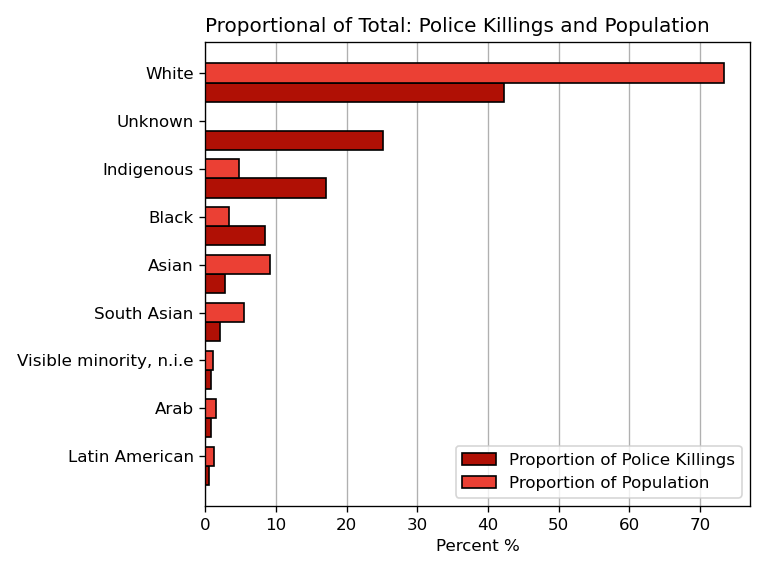

                             PROV         0
RACE                                       
Latin American           0.005034  0.012726
Arab                     0.008389  0.014885
Visible minority, n.i.e  0.008389  0.010368
South Asian              0.020134  0.054752
Asian                    0.028523  0.091500
Black                    0.083893  0.034096
Indigenous               0.171141  0.047616
Unknown                  0.251678  0.000000
White                    0.422819  0.734057


<IPython.core.display.Javascript object>


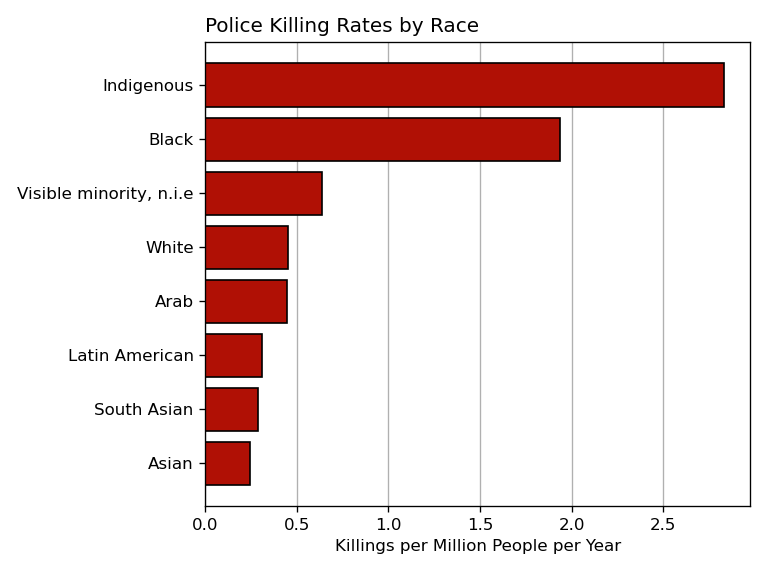

                         PROV         0      Norm
RACE                                             
Asian                      17   3216380  0.245612
South Asian                12   1924640  0.289734
Latin American              3    447330  0.311646
Arab                        5    523235  0.444059
White                     252  25803358  0.453829
Visible minority, n.i.e     5    364460  0.637511
Black                      50   1198545  1.938578
Indigenous                102   1673780  2.831845
0.8073842737105948
596


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


In [79]:

fig,ax=plt.subplots(1,1)
ax.grid(axis='x',zorder=0)

ax.set_title('Proportional of Total: Police Killings and Population',loc='left')
ByRace=Data.CA_PoliceKillings.groupby('RACE').count()['PROV'].sort_values()
ByRace=(ByRace/ByRace.sum()).to_frame()
ByRace = ByRace.join(Pop/Pop.sum(),lsuffix='_Pop')
print(ByRace)
# ByRace[['PROV',0]].plot(kind='barh')
ax.barh(np.arange(ByRace.index.shape[0])-.4,ByRace['PROV'].values*100,color='#b01005',edgecolor='k',
        height=.4,label='Proportion of Police Killings',zorder=2)
ax.barh(np.arange(ByRace.index.shape[0]),ByRace[0].values*100,color='#eb4034',edgecolor='k',
        height=.4,label='Proportion of Population',zorder=2)
ax.set_yticks(np.arange(ByRace.index.shape[0]))
ax.set_yticklabels(ByRace.index)
ax.set_xlabel('Percent %')
ax.legend()
plt.tight_layout()

plt.savefig('Content/CA_Race_Proportional.png')


fig,ax=plt.subplots(1,1)
ax.grid(axis='x',zorder=0)

ax.set_title('Police Killing Rates by Race',loc='left')
ByRace=Data.CA_PoliceKillings.groupby('RACE').count()['PROV'].sort_values()
ByRace=ByRace.to_frame()
ByRace = ByRace.join(Pop,lsuffix='_Pop')
ByRace['Norm']=ByRace['PROV'].values/ByRace[0].values*1e6/Data.CA_Length
ByRace=ByRace.sort_values(by='Norm')[:-1]
print(ByRace)
# ByRace[['PROV',0]].plot(kind='barh')
# ax.barh(np.arange(ByRace.index.shape[0])-.4,ByRace['PROV'].values,color='#b01005',edgecolor='k',
#         height=.4,label='Proportion of Police Killings',zorder=2)
ax.barh(np.arange(ByRace.index.shape[0]),ByRace['Norm'],color='#b01005',edgecolor='k',
        height=.8,label='Proportion of Population',zorder=2)
ax.set_yticks(np.arange(ByRace.index.shape[0]))
ax.set_yticklabels(ByRace.index)
ax.set_xlabel('Killings per Million People per Year')
# ax.legend()
plt.tight_layout()

plt.savefig('Content/CA_Race_Normalized.png')



print(CA_Total.sum()/Data.CA.Total.sum()/21*1e6)
# print(Data.CA.Total.sum())
print(CA_Total.sum())

In [80]:
print(ByRace)
from scipy.stats import chisquare
print(ByRace.index)
# R = ['Indigenous','White','Black','Arab','Asian']
R = ByRace.index.values#.drop('Unknown').values
Dept = ['Winnipeg Police Service','Vancouver Police Department','Toronto Police Service','Calgary Police Service','Edmonton Police Service']
City = ['Winnipeg','Vancouver','Toronto','Calgary','Edmonton']
FOBS = []
FEXP = []
for D,C in zip(Dept,City):
    F_obs = Departments_GPD.loc[Departments_GPD.index == D,R].values.flatten()
    F_exp = Data.Municipal_Boundaries.loc[Data.Municipal_Boundaries['Name'] == C,R].values.flatten()
    F_exp = F_exp/F_exp.sum()*Data.CA_PoliceKillings.loc[Data.CA_PoliceKillings['POLICE SERVICE']==D,'GENDER'].count()#F_obs.sum()
    
    FOBS.append(F_obs)
    FEXP.append(F_exp)
#     print(F_exp)
    res = chisquare(F_obs, f_exp=F_exp)
    print(C,F_obs.sum(),res[1])

# print(Data.CA['PREABBR'])
# print(Data.CA['PREABBR'])
# Data.CA.head()
P = Departments_GPD['PROV'].unique()
# P2 = ['B.C.','B.C.']

R2 = [r+'_Killings'for r in R]
for p in P:
    try:
        F_obs = Data.CA.loc[((Data.CA.index ==  p)),
                                    R2].fillna(0).values.flatten()
        F_exp = Data.CA.loc[Data.CA.index== p,R].fillna(0).values.flatten()
        F_exp = F_exp/F_exp.sum()*F_obs.sum()
        FOBS.append(F_obs)
        FEXP.append(F_exp)
#         print(F_obs,F_exp)
        res = chisquare(F_obs, f_exp=F_exp)
        print(p,F_obs.sum(),res[1])
        
    except:
        pass

# print(FOBS,FEXP)
# print(chisquare(np.array(FOBS).T, f_exp=np.array(FEXP).T))
# print()

F_obs=Data.CA[R2].fillna(0).sum().values
F_exp=Data.CA[R].fillna(0).sum().values

F0 = F_exp.tolist()
print(F_exp)
F0.append(F_exp.sum())
F0.append(0)
F_exp = F_exp*(Data.CA_PoliceKillings.count().RACE/F_exp.sum())

print()
res = chisquare(F_obs, f_exp=F_exp)
print(res)
R = R.tolist()
R.append('Total')

R = np.append(R,'Unknown')

F1 = F_exp.tolist()
F1.append(F_exp.sum())
F1.append(0)
F2 = F_obs.tolist()
F2.append(Data.CA_PoliceKillings.count().RACE)
F2.append(Data.CA['Unknown_Killings'].sum())

from tabulate import tabulate
d = {"By Race": ["Total Population (Millions)", "Expected Distribtuion", "Observed Killings"]}
for i,r in enumerate(R):
    d[r]=[int(F0[i]/1e5)/10,int(F1[i]),int(F2[i])]
df = pd.DataFrame(d).set_index("By Race")
df = df.T.sort_values(by='Total Population (Millions)',ascending=False).T
df.loc[df.index!='Observed Killings','Unknown']='--'


print(tabulate(df.T, tablefmt="pipe", headers="keys"))
print(Data.CA['Total_Killings'].sum()/Data.CA['Total'].sum()*1e6/21)
print(Data.CA['Total_Killings'].sum())
print(Data.CA_PoliceKillings.count())

T = (Data.CA_PoliceKillings.loc[Data.CA_PoliceKillings['RACE']=='Unknown'].groupby('POLICE SERVICE').count()['GENDER'].sort_values())

print(T/T.sum())

                         PROV         0      Norm
RACE                                             
Asian                      17   3216380  0.245612
South Asian                12   1924640  0.289734
Latin American              3    447330  0.311646
Arab                        5    523235  0.444059
White                     252  25803358  0.453829
Visible minority, n.i.e     5    364460  0.637511
Black                      50   1198545  1.938578
Indigenous                102   1673780  2.831845
Index(['Asian', 'South Asian', 'Latin American', 'Arab', 'White',
       'Visible minority, n.i.e', 'Black', 'Indigenous'],
      dtype='object', name='RACE')
Winnipeg 20.0 2.359879704184608e-12
Vancouver 16.0 0.005393366299093598
Toronto 43.0 3.676653498562747e-10
Calgary 20.0 0.025706270417982395
Edmonton 19.0 0.015212985775639757
BC 86.0 1.9621374012727457e-06
ON 140.0 1.455887072921131e-26
QC 84.0 1.3461659481051927e-11
NB 5.0 0.01565901751250399
AB 63.0 4.572676542345333e-11
NS 7.0 0.985518

https://bccla.org/wp-content/uploads/2012/03/2012-BCCLA-Report-Police-Involved-Deaths3.pdf